In [ ]:
# Things move fast
# Old:
with tokenizer.as_target_tokenizer():
  targets = tokenizer(fr_sentence)

# New:
targets = tokenizer(text_targets=es_sentence)

In [2]:
# sentencepiece is req. for the tokenizer to work
!pip install transformers datasets sentencepiece

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 52.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.6/474.6 kB 38.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 67.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 22.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 95.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 19.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 65.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 23.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━

In [3]:
#
from datasets import load_dataset
# possible language pairs: https://opus.nlpl.eu/KDE4.php
data = load_dataset("kde4", lang1="en", lang2="sv")
data

Generating train split: 0 examples [00:00, ? examples/s]

Dataset kde4 downloaded and prepared to /root/.cache/huggingface/datasets/kde4/en-sv-lang1=en,lang2=sv/0.0.0/243129fb2398d5b0b4f7f6831ab27ad84774b7ce374cf10f60f6e1ff331648ac. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

DatasetDict({
    train: Dataset({
        features: ['id', 'translation'],
        num_rows: 232485
    })
})

In [4]:
# make the dataset managable
small = data["train"].shuffle(seed=42).select(range(1_000))

In [5]:
# split the dataset into train and test
split = small.train_test_split(seed=42)

In [6]:
# print out one sample from the dataset
split["train"][0]

{'id': '95084', 'translation': {'en': 'Download', 'sv': 'Ladda ner'}}

In [7]:
# load up the tokenizer object
from transformers import AutoTokenizer

checkpoint = "Helsinki-NLP/opus-mt-en-sv"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

/usr/local/lib/python3.10/dist-packages/transformers/models/marian/tokenization_marian.py:194: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


In [8]:
# print out anexample sentence pair
en = split['train'][5]['translation']['en']
sv = split['train'][5]['translation']['sv']

en, sv

('with this Polygonal', 'med den här polygonformen')

In [9]:
# tokenize the input sentence
inputs = tokenizer(en)
inputs

{'input_ids': [44, 56, 12284, 5844, 314, 0], 'attention_mask': [1, 1, 1, 1, 1, 1]}

In [ ]:
# tokenize the target sentence
with tokenizer.as_target_tokenizer():
  targets = tokenizer(sv)
targets

In [11]:
# look at the tokens for the target
tokenizer.convert_ids_to_tokens(targets['input_ids'])

['▁med', '▁den', '▁här', '▁poly', 'gon', 'formen', '</s>']

In [12]:
# wrong language, this loks alot differnt from the above(the english tokenizer does not know swedish words), correct example
bad_targets = tokenizer(sv)
tokenizer.convert_ids_to_tokens(bad_targets['input_ids'])

['▁med', '▁den', '▁h', 'är', '▁poly', 'gon', 'for', 'men', '</s>']

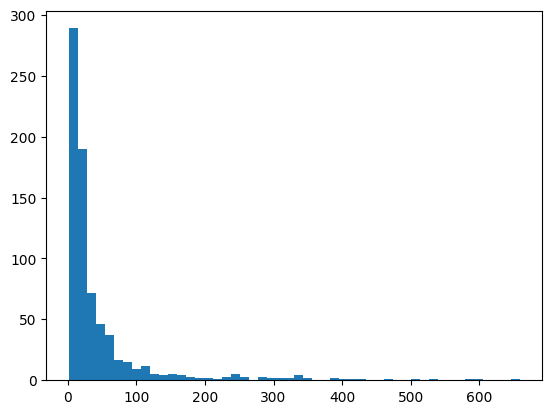

In [14]:
# draw a histogram of the inputs and targets
import matplotlib.pyplot as plt

train = split['train']['translation']
input_lens = [len(tr['en']) for tr in train]

plt.hist(input_lens, bins=50);

(array([202., 208., 108.,  59.,  42.,  24.,  14.,  14.,  10.,  11.,   2.,
          4.,   3.,   3.,   7.,   0.,   4.,   5.,   2.,   1.,   0.,   4.,
          2.,   3.,   3.,   1.,   2.,   0.,   2.,   0.,   0.,   1.,   1.,
          1.,   0.,   1.,   1.,   1.,   0.,   1.,   0.,   1.,   0.,   0.,
          0.,   1.,   0.,   0.,   0.,   1.]),
 array([  1.  ,  14.62,  28.24,  41.86,  55.48,  69.1 ,  82.72,  96.34,
        109.96, 123.58, 137.2 , 150.82, 164.44, 178.06, 191.68, 205.3 ,
        218.92, 232.54, 246.16, 259.78, 273.4 , 287.02, 300.64, 314.26,
        327.88, 341.5 , 355.12, 368.74, 382.36, 395.98, 409.6 , 423.22,
        436.84, 450.46, 464.08, 477.7 , 491.32, 504.94, 518.56, 532.18,
        545.8 , 559.42, 573.04, 586.66, 600.28, 613.9 , 627.52, 641.14,
        654.76, 668.38, 682.  ]),
 <BarContainer object of 50 artists>)

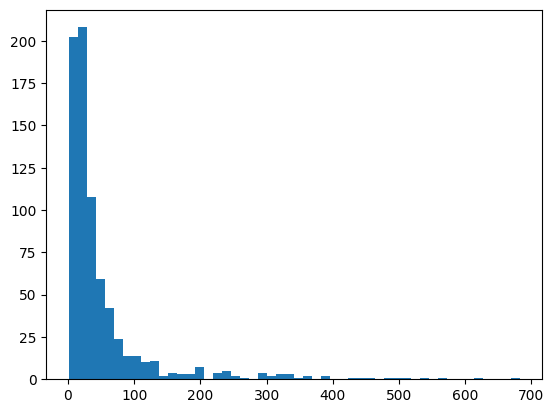

In [15]:
# draw a histogram of the target
target_lens = [len(tr['sv']) for tr in train]
plt.hist(target_lens, bins = 50)

In [16]:
# ser maximun sequence lenght
max_input_len = 128
max_target_len = 128

In [17]:
# tokenizer function
def tokenizer_fn(batch):
  inputs = [x['en'] for x in batch['translation']]
  targets = [x['sv'] for x in batch['translation']]

  tokenized_inputs = tokenizer(
      inputs, max_length=max_input_len, truncation=True
  )
  with tokenizer.as_target_tokenizer():
    tokenized_targets = tokenzier(
        targets, max_length=max_target_len, truncation=True
    )
    tokenized_inputs['labels'] = tokenized_targets['input_ids']
    return tokenized_inputs